In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
data=pd.read_csv('Training 1 data.csv')

In [18]:
data.head()

,engine no.,cycles,operational setting 1,os2,os3,sensor measurement 1,sm2,sm3,sm4,sm5,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,labels
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,0


In [19]:
data.columns

Index(['engine no.', 'cycles', 'operational setting 1', 'os2', 'os3',
       'sensor measurement 1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7', 'sm8',
       'sm9', 'sm10', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm16', 'sm17',
       'sm18', 'sm19', 'sm20', 'sm21', 'labels'],
      dtype='object')

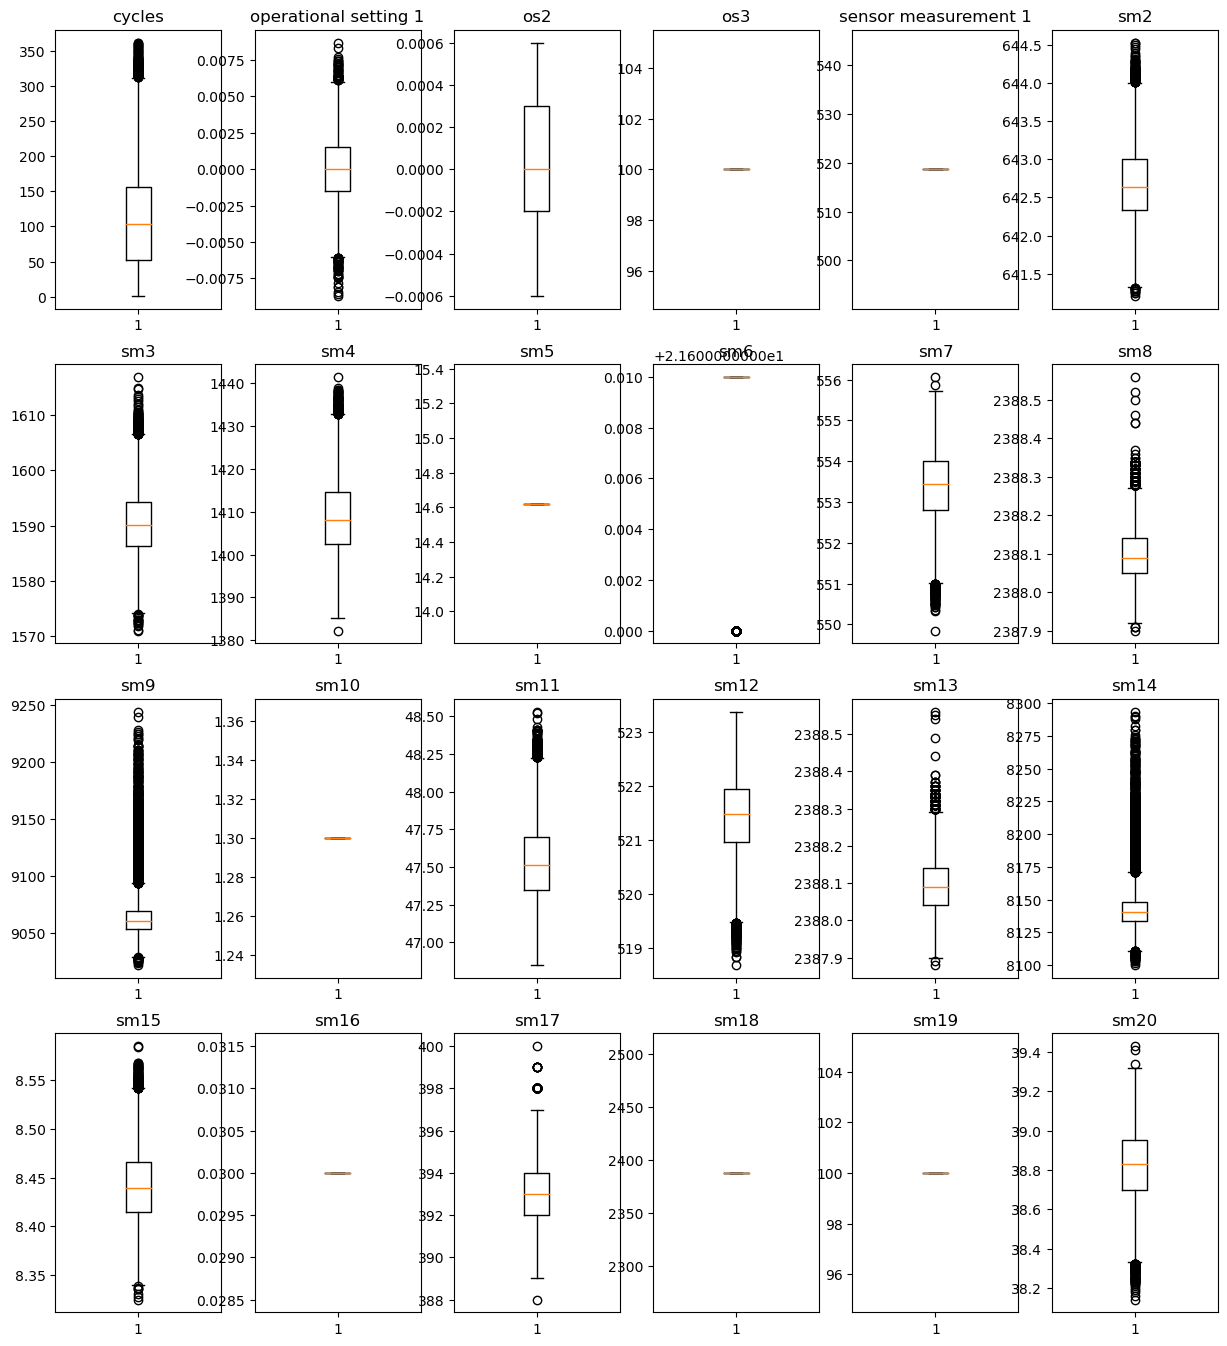

In [20]:
plt.figure(figsize=(15,21))
for i in np.arange (1,25):
    temp=data.iloc[:,i]
    plt.subplot(5,6,i)
    plt.boxplot(temp)
    plt.title(data.columns[i])
plt.show()

In [ ]:
data.drop(['os3','sensor measurement 1','sm5','sm6','sm10','sm16','sm18','sm19'],axis=1,inplace=True)
data.head()

In [ ]:
X=data.drop('labels',axis=1)
y=data['labels']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20 ,random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

In [ ]:
y_pred1=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred2=dt.predict(X_test)
accuracy_score(y_test,y_pred2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(X_train,y_train)
y_pred3=rm.predict(X_test)
accuracy_score(y_test,y_pred3)

0.9054774600096946

In [ ]:
 final_data=pd.DataFrame({'models':['LR','DT','RM'],'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                                                    accuracy_score(y_test,y_pred2)*100,
                                                   accuracy_score(y_test,y_pred3)*100]})

In [ ]:
sns.barplot(final_data['models'],final_data['Accuracy'])
plt.show()